# Assignment 1: Processing and Recording

## How to use this notebook:
The notebook is broken down into five exercises.  Within each exercise are explanatory
sections of text, and code. Sections that require a response will begin with: **Question:** 
and an empty box will follow.  Sometimes these will require a textual response, sometimes
code will be required.

## Outline:
The object of this assignment is to explore the relationship between the time and 
frequency domains using Python.

## Deadlines:
Please complete all the questions and hand in this notebook (completed) 
by the deadline set in class.

## Grading:
All reports should be presented legibly, with attention to grammar and spelling,
and all figures should be carefully labelled (include axes labels with units). 
A short summary and discussion should be given at the end of the notebook.

## Marks:
- Exercise 1: 5;
- Exercise 2: 5;
- Exercise 3: 10;
- Exercise 4: 7;
- Exercise 5: 5. 

In [1]:
# Set up your notebook here - what follows is what I recommed for plotting, but you can change it
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')

---
## Exercise 1: 
*5 marks*

We are going to experiment with signals and frequency.  We will create a signal of the form
\begin{equation*}
    y = \sin(4\pi t)+0.2\sin(16\pi t)
\end{equation*}
where $t$ is a time vector at a given sampling rate and test the effects 
of sampling rate on our ability to analyse the frequency content of such signals.  We will do this 
for at least two sampling rates so you may wish to run the commands below in a small function so that 
it is easy to run with different sampling rates.

First create a time vector spanning the interval 0–2$\pi$ seconds. It is simple to define a range
of values at a regular interval using numpy's `arange` or `linspace` functions. 
There is an example below, which generates a 100 Hz sampled time vector.

In [7]:
import numpy as np  # Remember that you have to import any modules you want to use

t = np.arange(start=0, stop=2 * np.pi, step=0.01)

**Question:** Change the above to a sampling frequency of your chosing: 
What sampling frequency did you use, and what is the Nyquist for this sampling frequency?

**Response:**

Next, create and plot a signal vector $y$ according to the formula:
\begin{equation*}
    y = \sin(4\pi t) + 0.2\sin(16\pi t)
\end{equation*}

Text(0, 0.5, 'Amplitude')

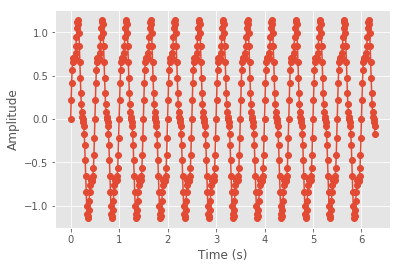

In [12]:
y = np.sin(4 * np.pi * t) + 0.2 * np.sin(16 * np.pi * t)
plt.plot(t, y, '-o', )
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")

**Question:** What are the two frequencies we have used here?

**Response:**

Play with the axes commands to make the plot readable. Make sure to annotate this graph (and all
following graphs) appropriately including axes labels with units (when meaningful) and a title 
(to get a title use `plt.title("some title")`.  In the above I have plotted sample points
as dots so we can clearly see where we have sampled.

**Question:** Now let’s look at the spectrum of the signal we’ve created. 
You should be able to copy code from the [Fourier transform](3_Fourier_Transfrom.ipynb) notebook 
for this purpose. You should write code in the box below that computes the FFT of this signal and
plots the amplitude spectrum.

In [ ]:
# Response: for you to fill in!

**Question:** What do you notice about the amplitudes of the two frequencies… which one’s bigger?  Does this seem correct, given the equation you used to create s in the first place?

**Response:**

If you recovered the frequencies you expected your sampling frequency was high enough to recover all 
the original frequencies. 

**Question:** Take what you used from above and write a function to generate this waveform
for a given sampling frequency - write this function in the cell below (this should just be copy-and-paste).
I have started you off with a function statement and some pseudo code:

In [13]:
# Response: I have started you off
def sample_and_plot(sampling_rate):
    """
    Generate a discretely sampled time-series and plot it and 
    it's amplitude spectra.
    
    :type sampling_rate: float
    :param sampling_rate: The deseried sampling-rate to use.
    """
    # Generate your time-vector
    
    # Generate you time-series
    
    # Calculate the FFT
    
    # Plot the time-series and the amplitude spectrum.

**Question:** Run your function with a different sampling-rate to the one you used previously.

In [14]:
# Response - run your function here

If you did not recover the expected frequencies, your sampling rate was probably too low.  Repeat steps a-d with a higher sampling rate.  Think about what sampling we will need to correctly sample the highest frequencies in the signal and try again until you can recover the original frequencies.

**Question:** What is the lowest sampling-rate you can use to accurately represent the 
frequencies present in this function?

**Response:**

---
## Exercise 2:
*5 marks*

**Objective:** Sum cosine waves of varying frequencies to generate a delta function (a spike).

You can simply create cosine waves using numpy and sum them together.  Below is an exmaple of
this for a few cosine waves:

Text(0, 0.5, 'Amplitude')

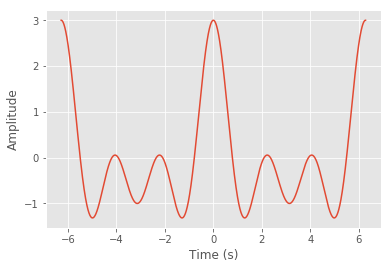

In [17]:
t = np.arange(-2 * np.pi, 2 * np.pi, 0.001)
y = np.zeros_like(t)  # Create an array of zeros the same shape as t
y += np.cos(t)
y += np.cos(2 * t)
y += np.cos(3 * t)
plt.plot(t, y)
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")

**Question:** Calculate and plot the amplitude spectrum of the sum:

In [ ]:
# Response: write your code here - remember to label axes on your plots

**Question:** Try more terms to see how close you can get to a delta function (hint: write a loop to create the new sine waves) - plot the amplitude spectrum and the time-series at the end.

In [ ]:
# Response: write your code here - remember to label axes on your plots

**Question:** Did you achieve a waveform that looks like a delta function with this method, and if not, why not? 

**Response:**

---
## Exercise 3:
*10 marks*

Now we’ll experiment with S wave data recorded at three sites in Porirua.

The data for this section are stored in a matlab formatted file, which we can read in using
scipy's `io.loadmat` function:

In [41]:
from scipy.io import loadmat

pdata = loadmat("Data/porirua_data.mat")
quake_data = pdata['quake_data']
# NBVAL_IGNORE_OUTPUT
print(quake_data)

[[  0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00]
 [  1.00000000e-02  -6.55910000e+00   9.55670000e+00  -2.09670000e+01]
 [  2.00000000e-02  -7.72860000e+00   3.07810000e+01  -7.32000000e+01]
 ..., 
 [  9.97000000e+00   1.99530000e+00  -5.00900000e+00   9.91630000e+01]
 [  9.98000000e+00   0.00000000e+00   0.00000000e+00   1.75790000e+01]
 [  9.99000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00]]


The data matrix contains four columns: column 1 is the time data, 
and column 2–4 are the seismometer horizontal component data for stations PB8, PB5, and 
L18 at a rock site in Porirua, a sedimentary basin in Porirua, and a sedimentary basin in 
Naenae, respectively.

**Question:** What is the sample rate for this data?

**Response:**

**Question:** Plot each data series as a function of time using different colours or try plotting each waveform in a different subplot.

In [ ]:
# Response: Write your plotting code here

**Question:** Describe, as quantitatively as possible, any notable differences between the three waveforms.  What are the sampling intervals and Nyquist frequencies?

**Response:**

**Question:** Compute the Fourier transform of each waveform and plot (using subplot if you like) 
the three amplitude spectra, or the three corresponding power spectra.  You will only need to 
calculate the frequency vector once, since it will be the same for all three spectra - you should be
able to reuse old code - maybe it could have been written as a function... *hint*.

In [42]:
# Response: Write your code here

The data from PB5 and L18 were collected in sedimentary basins, which can shake like a bowl of 
jelly in response to seismic waves. A basin can resonate at particular frequencies just like a 
simple harmonic oscillator. The resonance continues long after the seismic energy has been 
attenuated at the nearby rock site. The frequency of oscillation for a simple cylindrical basin 
is related to the velocity of the material and the depth of the basin. A wave whose wavelength is 
four times the thickness of the basin will resonate in the basin:
\begin{equation*}
    4 \times thickness = wavelength = \frac{velocity}{frequency}
\end{equation*}

The surface shear wave velocity in Porirua has been measured at 110 m s–1, while in Naenae 
it is 80 m s–1.  

**Question:** Estimate a thickness for each basin.

**Response:** 

Now we’ll filter the signals using various low-, high-, and bandpass filters. The simplest way
to do this is going to be to create obspy `Traces` for each channel, an example of how to do that is
below:

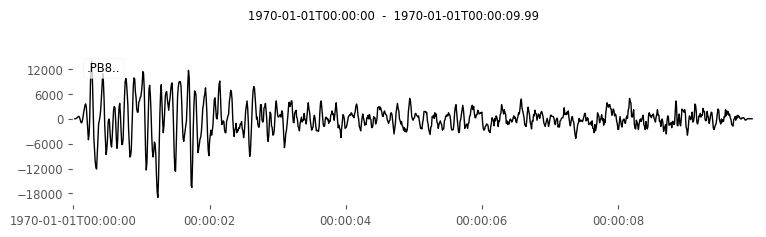

In [46]:
from obspy import Trace

tr = Trace(quake_data.T[1])
tr.stats.station = "PB8"
tr.stats.delta = quake_data[1][0] - quake_data[0][0]
fig = tr.plot()

Experiment with creating and applying various filters to this waveform. Compare the spectra of 
different filtered waveforms to the original spectra, and confirm that the filters are doing what 
you anticipated.

**Question:** What effect does increasing the order of the filter have on the signal (compare 
order 2 to order 4 and 8) ?  What phase effects does it have?

In [ ]:
# Response - you will need code and text for this one, and plots too!

**Question:** What effect does applying the same filter several times have?

In [ ]:
# Response - you will need code and text for this one, and plots too!

---
## Exercise 4:
*5 marks*

**Seismic background noise**: 
Two sets of noise data should be in the Data directory for this module: cottontest.ms and firthtest.ms.
They contain noise time-series recorded on broadband seismometers in two locations: cottontest 
was recorded at on the bottom floor of the Cotton building here at Vic. Firthtest was recorded
at Martha's (single-story) house in Firth Terrace, Karori. The sampling-rate for Firth and 
Cottontest is in headers.

**Question:** Read in both sets of data and compute Fourier transforms - use obspy's `read` 
function, remember to import it if you haven't already. Plot the data and their amplitude
spectra.

In [18]:
# Response: Write your code here

**Question:** What are the sampling rates of the two datasets?

**Response:**

**Question:** What are the dominant periods of the noise in the two locations?

**Response:**

**Question:** Does your data seem to verify the “rule of thumb” that the natural period of 
a building is equal to 0.1 s $\times$ number of stories?  

**Response:**

**Question:** Can you see the “microseism” peak that is associated with waves?  What period and frequency does it correspond to?

**Response:**

---
## Exercise 5:
*5 marks*

**Seismometer response**
We are going to compare the response of two closely spaced, but different instruments to the M7.1
Te Araroa earthquake in 2016. The two sites we will use are located near Inchbonnie on the West 
Coast of South Island, New Zealand. We will work with sites 
[INZ](https://www.geonet.org.nz/data/network/sensor/INZ) and 
[IFPS](https://www.geonet.org.nz/data/network/sensor/IFPS)


**Question:** Download the data for those sites from GeoNet between 2016/09/01 16:38 and 16:48. Download
all HH? channels for INZ and BN? channels for IFPS. Plot the stream containing all traces.

In [ ]:
# Response: Write your code here

**Question:** Download the instrument response information from those sites and correct to 
displacement - plot the resulting stream. Note that GeoNets FDSN service does not remove information
outside the time-scale asked for - obspy will sort this out when removing the response.

*Note: remember to copy your data be

In [39]:
# Response: Write your code here

**Question:** Describe the differences between the two corrected responses, and explain why the 
differences exist.

**Response:** 

**Question:** Convert instead to acceleration - again describe the differences and give reasons - think
about the type of seismometer and the sensitivity of that instrument to these waves.

In [40]:
# Response: Write your code here

**Response:**

---
## Summary

Discuss what you learnt in this module - highlight key points in recording seismic waves, 
and processing the data.

**Response:**